In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/license-plate-crops/crops/license_plate/b1a50a3824887ee2_jpg.rf.68a4fd34fce20184287592f2680f895b.jpg
/kaggle/input/license-plate-crops/crops/license_plate/bbcac63e32bd8137_jpg.rf.ef4704b0ada4fbbf613143abf52f6f86.jpg
/kaggle/input/license-plate-crops/crops/license_plate/c650ff8d3e8e75b3_jpg.rf.a469a8f0edb8fddf8e2b70b102f5a5eb.jpg
/kaggle/input/license-plate-crops/crops/license_plate/d2fe2b47668e9d8e_jpg.rf.c3c019d146ec1fc0bcf7fbeb12c7bc7f.jpg
/kaggle/input/license-plate-crops/crops/license_plate/b6e55f97085c3732_jpg.rf.09a6d8dc1a08e66131bdb8b57377b05b.jpg
/kaggle/input/license-plate-crops/crops/license_plate/c1d8b110186e095a_jpg.rf.1515701021c709417f9e92537a1d3714.jpg
/kaggle/input/license-plate-crops/crops/license_plate/c91ee912164d8ecb_jpg.rf.5a70d8b40bde25a3a4cb09337bf0c6f9.jpg
/kaggle/input/license-plate-crops/crops/license_plate/cb8c75fc1c7ccf73_jpg.rf.a6d315cf4a3ef0824075df8c8561838b.jpg
/kaggle/input/license-plate-crops/crops/license_plate/be654a7eabe0e891_jpg.rf.5e

In [2]:
%%bash
# Make a working directory for the plates
mkdir -p /kaggle/working/license_plates

# Copy all .jpg files from the read-only input into working/
cp /kaggle/input/license-plate-crops/crops/license_plate/*.jpg \
   /kaggle/working/license_plates/

# Show a few to confirm
echo "Files in /kaggle/working/license_plates/:"
ls -1 /kaggle/working/license_plates | head -n 10


Files in /kaggle/working/license_plates/:
b193070a9c45b5ab_jpg.rf.57e5987eb896a7bf9fc7a1a96a660c7e.jpg
b1a50a3824887ee2_jpg.rf.68a4fd34fce20184287592f2680f895b.jpg
b25d7d2cb7abf86b_jpg.rf.36edce738b0e69965e001035d6f85ab3.jpg
b32671b7cc279583_jpg.rf.f898026e2169a3b6adc4d21aee6d06c5.jpg
b5e7183b6a5abe6c_jpg.rf.fa89af80aebfc925bb0121ab5b024260.jpg
b6580dec5ada277d_jpg.rf.3ec17c0d68df1e6818d590e410bc3d00.jpg
b6e55f97085c3732_jpg.rf.09a6d8dc1a08e66131bdb8b57377b05b.jpg
b6ecda23586a6ba5_jpg.rf.d737139968dd3f08447305aa7b7f6002.jpg
b7cdb5c0c99002b7_jpg.rf.2c46810fbf4036039cb03a135e20e9c3.jpg
b91c3aaba25bf914_jpg.rf.1f03184f0c412a59b83c4099861cedcf.jpg


In [3]:
%%bash
pip install -q easyocr opencv-python-headless


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 75.4 MB/s eta 0:00:00


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pylibcugraph-cu12 24.12.0 requires pylibraft-cu12==24.12.*, but you have pylibraft-cu12 25.2.0 which is incompatible.
pylibcugraph-cu12 24.12.0 requires rmm-cu12==24.12.*, but you have rmm-cu12 25.2.0 which is incompatible.


Found 29 images to OCR.

b193070a9c45b5ab_jpg.rf.57e5987eb896a7bf9fc7a1a96a660c7e.jpg → ['']


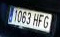

------------------------------------------------------------
b1a50a3824887ee2_jpg.rf.68a4fd34fce20184287592f2680f895b.jpg → ['SB5Ji2018']


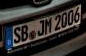

------------------------------------------------------------
b25d7d2cb7abf86b_jpg.rf.36edce738b0e69965e001035d6f85ab3.jpg → ['103932 ', 'VIRGINIA']


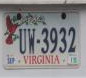

------------------------------------------------------------
b32671b7cc279583_jpg.rf.f898026e2169a3b6adc4d21aee6d06c5.jpg → ['208']


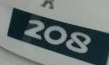

------------------------------------------------------------
b5e7183b6a5abe6c_jpg.rf.fa89af80aebfc925bb0121ab5b024260.jpg → ['HbbX  3499']


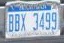

------------------------------------------------------------
b6580dec5ada277d_jpg.rf.3ec17c0d68df1e6818d590e410bc3d00.jpg → ['Ul', '@OC']


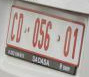

------------------------------------------------------------
b6e55f97085c3732_jpg.rf.09a6d8dc1a08e66131bdb8b57377b05b.jpg → ['I54]']


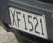

------------------------------------------------------------
b6ecda23586a6ba5_jpg.rf.d737139968dd3f08447305aa7b7f6002.jpg → ['REHv 927']


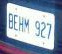

------------------------------------------------------------
b7cdb5c0c99002b7_jpg.rf.2c46810fbf4036039cb03a135e20e9c3.jpg → ['Elqp']


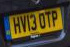

------------------------------------------------------------
b91c3aaba25bf914_jpg.rf.1f03184f0c412a59b83c4099861cedcf.jpg → []


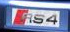

------------------------------------------------------------
b94993a2d67b455e_jpg.rf.62712d980344cb842644f82e63b13092.jpg → []


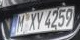

------------------------------------------------------------
b9f5b9acf1777acf_jpg.rf.b92969d5c3738ece6a84dcd2d0ea3ce0.jpg → ['GLENIE']


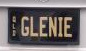

------------------------------------------------------------
bbcac63e32bd8137_jpg.rf.ef4704b0ada4fbbf613143abf52f6f86.jpg → ['643', 'FAG']


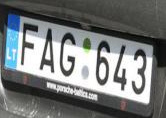

------------------------------------------------------------
be654a7eabe0e891_jpg.rf.5e43d4106641423a278d096d24822902.jpg → ['IkwW']


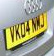

------------------------------------------------------------
be9fd0014b5a4f2a_jpg.rf.20dc7369d0a83ad74a123727228dce11.jpg → ['21222,67']


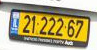

------------------------------------------------------------
bf2f25f3ed9ff4d5_jpg.rf.e9d07ec8b85372d40366bc2770b7d537.jpg → ['V147 JAR']


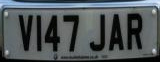

------------------------------------------------------------
c1d8b110186e095a_jpg.rf.1515701021c709417f9e92537a1d3714.jpg → []


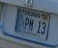

------------------------------------------------------------
c274e026ac907eb9_jpg.rf.2388de7229ba0dd3051326f64c1a770b.jpg → ['DEL;', '0']


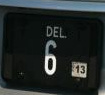

------------------------------------------------------------
c650ff8d3e8e75b3_jpg.rf.a469a8f0edb8fddf8e2b70b102f5a5eb.jpg → ['@223']


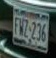

------------------------------------------------------------
c7df5232291486a3_jpg.rf.d18b52a383576cfe6c4ec343fca07a80.jpg → ['064', 'W']


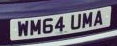

------------------------------------------------------------
c91ee912164d8ecb_jpg.rf.5a70d8b40bde25a3a4cb09337bf0c6f9.jpg → ['Mi3344']


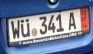

------------------------------------------------------------
cb4b754537798d23_jpg.rf.310e3c4544bf89d2f3109956b301db20.jpg → []


------------------------------------------------------------
cb8c75fc1c7ccf73_jpg.rf.a6d315cf4a3ef0824075df8c8561838b.jpg → ['PCJ', '5661']


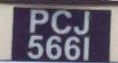

------------------------------------------------------------
ccc1a2d44a290368_jpg.rf.8e8d6f87f1d1327caf5f80e0c96cdad9.jpg → ['C26727']


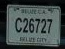

------------------------------------------------------------
cdb1e8621d1c624e_jpg.rf.b744b93a7af0771f1e5cb955155c8451.jpg → ['PLOI']


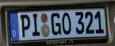

------------------------------------------------------------
d027c6e32db60e3c_jpg.rf.15a865d02f390ef84fca8e053946db31.jpg → ['NBT']


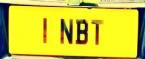

------------------------------------------------------------
d27e094e98374ff8_jpg.rf.a0e0eba539117b97eb6433295c4cfb44.jpg → ['CECEv']


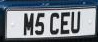

------------------------------------------------------------
d28d71c2690c16ed_jpg.rf.b7c4b2a5e5870d9fcf8644c109c5457f.jpg → ['Ntp 56m1']


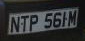

------------------------------------------------------------
d2fe2b47668e9d8e_jpg.rf.c3c019d146ec1fc0bcf7fbeb12c7bc7f.jpg → ['ACNL:']


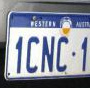

------------------------------------------------------------


In [4]:
import glob
import cv2
import easyocr
from IPython.display import Image, display

# Initialize OCR reader (English)
reader = easyocr.Reader(['en'], gpu=False)

# List all cropped plate images
paths = sorted(glob.glob('/kaggle/working/license_plates/*.jpg'))
print(f"Found {len(paths)} images to OCR.\n")

# Perform OCR and display
for p in paths:
    # Load and convert color for EasyOCR
    img = cv2.imread(p)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Extract text
    texts = reader.readtext(img, detail=0)

    # Show results
    print(f"{p.split('/')[-1]} → {texts}")
    display(Image(filename=p, width=300))
    print("-" * 60)


## LOGIC 2

In [5]:
%%bash
pip install -q pytesseract opencv-python-headless
apt-get update -qq && apt-get install -qq -y tesseract-ocr
%%bash
pip install -q pytesseract opencv-python-headless
apt-get update -qq && apt-get install -qq -y tesseract-ocr


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
bash: line 3: fg: no job control
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


Image: b193070a9c45b5ab_jpg.rf.57e5987eb896a7bf9fc7a1a96a660c7e.jpg


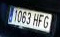

EasyOCR: ['']
Tesseract+Preproc: BE
------------------------------------------------------------
Image: b1a50a3824887ee2_jpg.rf.68a4fd34fce20184287592f2680f895b.jpg


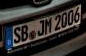

EasyOCR: ['SB5Ji2018']
Tesseract+Preproc: 
------------------------------------------------------------
Image: b25d7d2cb7abf86b_jpg.rf.36edce738b0e69965e001035d6f85ab3.jpg


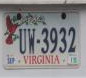

EasyOCR: ['103932 ', 'VIRGINIA']
Tesseract+Preproc: F L
------------------------------------------------------------
Image: b32671b7cc279583_jpg.rf.f898026e2169a3b6adc4d21aee6d06c5.jpg


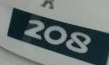

EasyOCR: ['208']
Tesseract+Preproc: 8
------------------------------------------------------------
Image: b5e7183b6a5abe6c_jpg.rf.fa89af80aebfc925bb0121ab5b024260.jpg


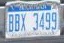

EasyOCR: ['HbbX  3499']
Tesseract+Preproc: 
------------------------------------------------------------
Image: b6580dec5ada277d_jpg.rf.3ec17c0d68df1e6818d590e410bc3d00.jpg


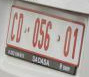

EasyOCR: ['Ul', '@OC']
Tesseract+Preproc: I
------------------------------------------------------------
Image: b6e55f97085c3732_jpg.rf.09a6d8dc1a08e66131bdb8b57377b05b.jpg


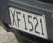

EasyOCR: ['I54]']
Tesseract+Preproc: EB
------------------------------------------------------------
Image: b6ecda23586a6ba5_jpg.rf.d737139968dd3f08447305aa7b7f6002.jpg


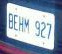

EasyOCR: ['REHv 927']
Tesseract+Preproc: A
------------------------------------------------------------
Image: b7cdb5c0c99002b7_jpg.rf.2c46810fbf4036039cb03a135e20e9c3.jpg


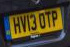

EasyOCR: ['Elqp']
Tesseract+Preproc: E
------------------------------------------------------------
Image: b91c3aaba25bf914_jpg.rf.1f03184f0c412a59b83c4099861cedcf.jpg


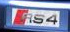

EasyOCR: []
Tesseract+Preproc: G
------------------------------------------------------------
Image: b94993a2d67b455e_jpg.rf.62712d980344cb842644f82e63b13092.jpg


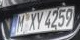

EasyOCR: []
Tesseract+Preproc: 
------------------------------------------------------------
Image: b9f5b9acf1777acf_jpg.rf.b92969d5c3738ece6a84dcd2d0ea3ce0.jpg


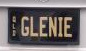

EasyOCR: ['GLENIE']
Tesseract+Preproc: 
------------------------------------------------------------
Image: bbcac63e32bd8137_jpg.rf.ef4704b0ada4fbbf613143abf52f6f86.jpg


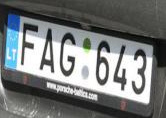

EasyOCR: ['643', 'FAG']
Tesseract+Preproc: 2
------------------------------------------------------------
Image: be654a7eabe0e891_jpg.rf.5e43d4106641423a278d096d24822902.jpg


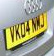

EasyOCR: ['IkwW']
Tesseract+Preproc: E
------------------------------------------------------------
Image: be9fd0014b5a4f2a_jpg.rf.20dc7369d0a83ad74a123727228dce11.jpg


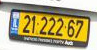

EasyOCR: ['21222,67']
Tesseract+Preproc: S
------------------------------------------------------------
Image: bf2f25f3ed9ff4d5_jpg.rf.e9d07ec8b85372d40366bc2770b7d537.jpg


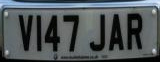

EasyOCR: ['V147 JAR']
Tesseract+Preproc: 
------------------------------------------------------------
Image: c1d8b110186e095a_jpg.rf.1515701021c709417f9e92537a1d3714.jpg


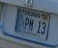

EasyOCR: []
Tesseract+Preproc: 
------------------------------------------------------------
Image: c274e026ac907eb9_jpg.rf.2388de7229ba0dd3051326f64c1a770b.jpg


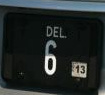

EasyOCR: ['DEL;', '0']
Tesseract+Preproc: 
------------------------------------------------------------
Image: c650ff8d3e8e75b3_jpg.rf.a469a8f0edb8fddf8e2b70b102f5a5eb.jpg


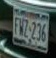

EasyOCR: ['@223']
Tesseract+Preproc: 
------------------------------------------------------------
Image: c7df5232291486a3_jpg.rf.d18b52a383576cfe6c4ec343fca07a80.jpg


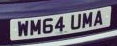

EasyOCR: ['064', 'W']
Tesseract+Preproc: 
------------------------------------------------------------
Image: c91ee912164d8ecb_jpg.rf.5a70d8b40bde25a3a4cb09337bf0c6f9.jpg


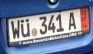

EasyOCR: ['Mi3344']
Tesseract+Preproc: 
------------------------------------------------------------
Image: cb4b754537798d23_jpg.rf.310e3c4544bf89d2f3109956b301db20.jpg


EasyOCR: []
Tesseract+Preproc: 
------------------------------------------------------------
Image: cb8c75fc1c7ccf73_jpg.rf.a6d315cf4a3ef0824075df8c8561838b.jpg


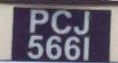

EasyOCR: ['PCJ', '5661']
Tesseract+Preproc: JECT
------------------------------------------------------------
Image: ccc1a2d44a290368_jpg.rf.8e8d6f87f1d1327caf5f80e0c96cdad9.jpg


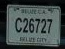

EasyOCR: ['C26727']
Tesseract+Preproc: 
------------------------------------------------------------
Image: cdb1e8621d1c624e_jpg.rf.b744b93a7af0771f1e5cb955155c8451.jpg


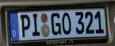

EasyOCR: ['PLOI']
Tesseract+Preproc: B
------------------------------------------------------------
Image: d027c6e32db60e3c_jpg.rf.15a865d02f390ef84fca8e053946db31.jpg


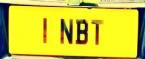

EasyOCR: ['NBT']
Tesseract+Preproc: EI
------------------------------------------------------------
Image: d27e094e98374ff8_jpg.rf.a0e0eba539117b97eb6433295c4cfb44.jpg


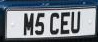

EasyOCR: ['CECEv']
Tesseract+Preproc: 
------------------------------------------------------------
Image: d28d71c2690c16ed_jpg.rf.b7c4b2a5e5870d9fcf8644c109c5457f.jpg


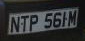

EasyOCR: ['Ntp 56m1']
Tesseract+Preproc: 
------------------------------------------------------------
Image: d2fe2b47668e9d8e_jpg.rf.c3c019d146ec1fc0bcf7fbeb12c7bc7f.jpg


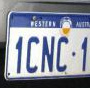

EasyOCR: ['ACNL:']
Tesseract+Preproc: 
------------------------------------------------------------


In [6]:
import glob
import cv2
import easyocr
import pytesseract
import numpy as np
from IPython.display import Image, display

# 1) Initialize EasyOCR reader
reader = easyocr.Reader(['en'], gpu=False)

# 2) Tesseract config (single line, alphanumeric)
tess_config = "--psm 7 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789"

# 3) Define preprocessing + Tesseract function
def tesseract_ocr(path):
    img = cv2.imread(path)
    # grayscale + invert
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.bitwise_not(gray)
    # Otsu threshold
    thresh = cv2.threshold(gray, 0, 255,
        cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
    # deskew
    coords = np.column_stack(np.where(thresh > 0))
    angle = cv2.minAreaRect(coords)[-1]
    angle = -(90 + angle) if angle < -45 else -angle
    (h, w) = img.shape[:2]
    M = cv2.getRotationMatrix2D((w//2, h//2), angle, 1.0)
    deskewed = cv2.warpAffine(thresh, M, (w, h),
                              flags=cv2.INTER_CUBIC,
                              borderMode=cv2.BORDER_REPLICATE)
    # OCR
    text = pytesseract.image_to_string(deskewed, config=tess_config).strip()
    return text

# 4) Loop over your cropped plates
paths = sorted(glob.glob('/kaggle/working/license_plates/*.jpg'))
for p in paths:
    # Display the image
    print(f"Image: {p.split('/')[-1]}")
    display(Image(p, width=300))
    
    # EasyOCR
    img = cv2.imread(p)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    easy_text = reader.readtext(img_rgb, detail=0)
    print("EasyOCR:", easy_text)
    
    # Tesseract
    tess_text = tesseract_ocr(p)
    print("Tesseract+Preproc:", tess_text)
    
    print("-" * 60)


In [7]:
import cv2

def upscale(img, scale=2):
    h, w = img.shape[:2]
    return cv2.resize(img, (w*scale, h*scale), interpolation=cv2.INTER_CUBIC)


In [8]:
def sharpen_and_equalize(img):
    # Convert to LAB and apply CLAHE to the L channel
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    cl = clahe.apply(l)
    lab = cv2.merge((cl,a,b))
    img_clahe = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)
    # Sharpen
    kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
    return cv2.filter2D(img_clahe, -1, kernel)


In [9]:
def denoise_and_morph(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Fast Non-Local Means Denoising
    denoised = cv2.fastNlMeansDenoising(gray, h=10)
    # Binary + Morphological closing to fill small gaps
    _, th = cv2.threshold(denoised, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
    closed = cv2.morphologyEx(th, cv2.MORPH_CLOSE, kernel)
    return closed



Image: b193070a9c45b5ab_jpg.rf.57e5987eb896a7bf9fc7a1a96a660c7e.jpg


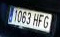

EasyOCR after preprocessing: []

Image: b1a50a3824887ee2_jpg.rf.68a4fd34fce20184287592f2680f895b.jpg


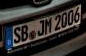

EasyOCR after preprocessing: ['SBs', 'J218.']

Image: b25d7d2cb7abf86b_jpg.rf.36edce738b0e69965e001035d6f85ab3.jpg


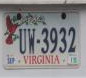

EasyOCR after preprocessing: ['~4;932', 'ilWi']

Image: b32671b7cc279583_jpg.rf.f898026e2169a3b6adc4d21aee6d06c5.jpg


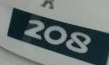

EasyOCR after preprocessing: ['208']

Image: b5e7183b6a5abe6c_jpg.rf.fa89af80aebfc925bb0121ab5b024260.jpg


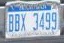

EasyOCR after preprocessing: []

Image: b6580dec5ada277d_jpg.rf.3ec17c0d68df1e6818d590e410bc3d00.jpg


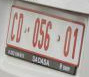

EasyOCR after preprocessing: ['#ES']

Image: b6e55f97085c3732_jpg.rf.09a6d8dc1a08e66131bdb8b57377b05b.jpg


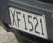

EasyOCR after preprocessing: []

Image: b6ecda23586a6ba5_jpg.rf.d737139968dd3f08447305aa7b7f6002.jpg


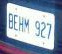

EasyOCR after preprocessing: []

Image: b7cdb5c0c99002b7_jpg.rf.2c46810fbf4036039cb03a135e20e9c3.jpg


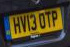

EasyOCR after preprocessing: ['HVITDP']

Image: b91c3aaba25bf914_jpg.rf.1f03184f0c412a59b83c4099861cedcf.jpg


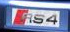

EasyOCR after preprocessing: ['Te4']

Image: b94993a2d67b455e_jpg.rf.62712d980344cb842644f82e63b13092.jpg


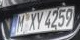

EasyOCR after preprocessing: []

Image: b9f5b9acf1777acf_jpg.rf.b92969d5c3738ece6a84dcd2d0ea3ce0.jpg


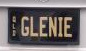

EasyOCR after preprocessing: ['GLEME']

Image: bbcac63e32bd8137_jpg.rf.ef4704b0ada4fbbf613143abf52f6f86.jpg


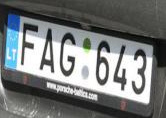

EasyOCR after preprocessing: ['FiG 643']

Image: be654a7eabe0e891_jpg.rf.5e43d4106641423a278d096d24822902.jpg


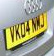

EasyOCR after preprocessing: []

Image: be9fd0014b5a4f2a_jpg.rf.20dc7369d0a83ad74a123727228dce11.jpg


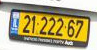

EasyOCR after preprocessing: ['2122267']

Image: bf2f25f3ed9ff4d5_jpg.rf.e9d07ec8b85372d40366bc2770b7d537.jpg


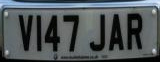

EasyOCR after preprocessing: ['V1AZ JAR']

Image: c1d8b110186e095a_jpg.rf.1515701021c709417f9e92537a1d3714.jpg


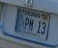

EasyOCR after preprocessing: []

Image: c274e026ac907eb9_jpg.rf.2388de7229ba0dd3051326f64c1a770b.jpg


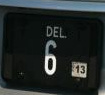

EasyOCR after preprocessing: ['DEL']

Image: c650ff8d3e8e75b3_jpg.rf.a469a8f0edb8fddf8e2b70b102f5a5eb.jpg


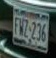

EasyOCR after preprocessing: []

Image: c7df5232291486a3_jpg.rf.d18b52a383576cfe6c4ec343fca07a80.jpg


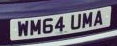

EasyOCR after preprocessing: ['W', 'NM64']

Image: c91ee912164d8ecb_jpg.rf.5a70d8b40bde25a3a4cb09337bf0c6f9.jpg


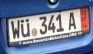

EasyOCR after preprocessing: ['4', 'Cy31']

Image: cb4b754537798d23_jpg.rf.310e3c4544bf89d2f3109956b301db20.jpg


EasyOCR after preprocessing: []

Image: cb8c75fc1c7ccf73_jpg.rf.a6d315cf4a3ef0824075df8c8561838b.jpg


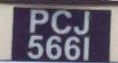

EasyOCR after preprocessing: ['PCJ', '5661']

Image: ccc1a2d44a290368_jpg.rf.8e8d6f87f1d1327caf5f80e0c96cdad9.jpg


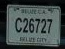

EasyOCR after preprocessing: ['C2e32}']

Image: cdb1e8621d1c624e_jpg.rf.b744b93a7af0771f1e5cb955155c8451.jpg


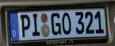

EasyOCR after preprocessing: ['PTGO3214']

Image: d027c6e32db60e3c_jpg.rf.15a865d02f390ef84fca8e053946db31.jpg


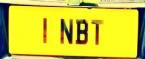

EasyOCR after preprocessing: ['NBT']

Image: d27e094e98374ff8_jpg.rf.a0e0eba539117b97eb6433295c4cfb44.jpg


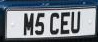

EasyOCR after preprocessing: ['Hscev']

Image: d28d71c2690c16ed_jpg.rf.b7c4b2a5e5870d9fcf8644c109c5457f.jpg


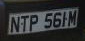

EasyOCR after preprocessing: ['MP 5611']

Image: d2fe2b47668e9d8e_jpg.rf.c3c019d146ec1fc0bcf7fbeb12c7bc7f.jpg


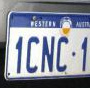

EasyOCR after preprocessing: ['ICN:A']


In [10]:
import glob, cv2, numpy as np
import easyocr
from IPython.display import Image, display

reader = easyocr.Reader(['en'], gpu=False)

def preprocess_for_easyocr(path):
    img = cv2.imread(path)
    # 1) Upscale
    img = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)
    # 2) Contrast + Sharpen
    img = sharpen_and_equalize(img)
    # 3) Denoise + Morphology
    bin_img = denoise_and_morph(img)
    # 4) Convert back to 3-channel for EasyOCR
    proc = cv2.cvtColor(bin_img, cv2.COLOR_GRAY2RGB)
    return proc

for p in sorted(glob.glob('/kaggle/working/license_plates/*.jpg')):
    print(f"\nImage: {p.split('/')[-1]}")
    display(Image(p, width=300))
    
    proc = preprocess_for_easyocr(p)
    # display preprocessed if you like:
    # cv2.imwrite('/kaggle/working/tmp.jpg', proc)
    # display(Image('/kaggle/working/tmp.jpg', width=300))
    
    # Run EasyOCR on the cleaned image
    text = reader.readtext(proc, detail=0, paragraph=False)
    print("EasyOCR after preprocessing:", text)


##FINAL LOGIC


Found 29 images to OCR.

b193070a9c45b5ab_jpg.rf.57e5987eb896a7bf9fc7a1a96a660c7e.jpg → ['']


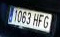

------------------------------------------------------------
b1a50a3824887ee2_jpg.rf.68a4fd34fce20184287592f2680f895b.jpg → ['SB5Ji2018']


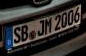

------------------------------------------------------------
b25d7d2cb7abf86b_jpg.rf.36edce738b0e69965e001035d6f85ab3.jpg → ['103932 ', 'VIRGINIA']


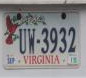

------------------------------------------------------------
b32671b7cc279583_jpg.rf.f898026e2169a3b6adc4d21aee6d06c5.jpg → ['208']


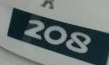

------------------------------------------------------------
b5e7183b6a5abe6c_jpg.rf.fa89af80aebfc925bb0121ab5b024260.jpg → ['HbbX  3499']


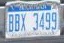

------------------------------------------------------------
b6580dec5ada277d_jpg.rf.3ec17c0d68df1e6818d590e410bc3d00.jpg → ['Ul', '@OC']


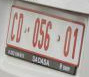

------------------------------------------------------------
b6e55f97085c3732_jpg.rf.09a6d8dc1a08e66131bdb8b57377b05b.jpg → ['I54]']


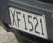

------------------------------------------------------------
b6ecda23586a6ba5_jpg.rf.d737139968dd3f08447305aa7b7f6002.jpg → ['REHv 927']


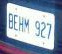

------------------------------------------------------------
b7cdb5c0c99002b7_jpg.rf.2c46810fbf4036039cb03a135e20e9c3.jpg → ['Elqp']


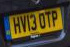

------------------------------------------------------------
b91c3aaba25bf914_jpg.rf.1f03184f0c412a59b83c4099861cedcf.jpg → []


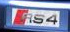

------------------------------------------------------------
b94993a2d67b455e_jpg.rf.62712d980344cb842644f82e63b13092.jpg → []


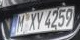

------------------------------------------------------------
b9f5b9acf1777acf_jpg.rf.b92969d5c3738ece6a84dcd2d0ea3ce0.jpg → ['GLENIE']


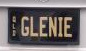

------------------------------------------------------------
bbcac63e32bd8137_jpg.rf.ef4704b0ada4fbbf613143abf52f6f86.jpg → ['643', 'FAG']


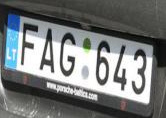

------------------------------------------------------------
be654a7eabe0e891_jpg.rf.5e43d4106641423a278d096d24822902.jpg → ['IkwW']


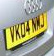

------------------------------------------------------------
be9fd0014b5a4f2a_jpg.rf.20dc7369d0a83ad74a123727228dce11.jpg → ['21222,67']


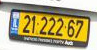

------------------------------------------------------------
bf2f25f3ed9ff4d5_jpg.rf.e9d07ec8b85372d40366bc2770b7d537.jpg → ['V147 JAR']


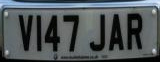

------------------------------------------------------------
c1d8b110186e095a_jpg.rf.1515701021c709417f9e92537a1d3714.jpg → []


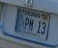

------------------------------------------------------------
c274e026ac907eb9_jpg.rf.2388de7229ba0dd3051326f64c1a770b.jpg → ['DEL;', '0']


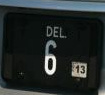

------------------------------------------------------------
c650ff8d3e8e75b3_jpg.rf.a469a8f0edb8fddf8e2b70b102f5a5eb.jpg → ['@223']


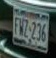

------------------------------------------------------------
c7df5232291486a3_jpg.rf.d18b52a383576cfe6c4ec343fca07a80.jpg → ['064', 'W']


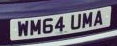

------------------------------------------------------------
c91ee912164d8ecb_jpg.rf.5a70d8b40bde25a3a4cb09337bf0c6f9.jpg → ['Mi3344']


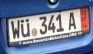

------------------------------------------------------------
cb4b754537798d23_jpg.rf.310e3c4544bf89d2f3109956b301db20.jpg → []


------------------------------------------------------------
cb8c75fc1c7ccf73_jpg.rf.a6d315cf4a3ef0824075df8c8561838b.jpg → ['PCJ', '5661']


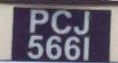

------------------------------------------------------------
ccc1a2d44a290368_jpg.rf.8e8d6f87f1d1327caf5f80e0c96cdad9.jpg → ['C26727']


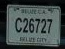

------------------------------------------------------------
cdb1e8621d1c624e_jpg.rf.b744b93a7af0771f1e5cb955155c8451.jpg → ['PLOI']


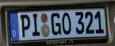

------------------------------------------------------------
d027c6e32db60e3c_jpg.rf.15a865d02f390ef84fca8e053946db31.jpg → ['NBT']


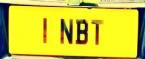

------------------------------------------------------------
d27e094e98374ff8_jpg.rf.a0e0eba539117b97eb6433295c4cfb44.jpg → ['CECEv']


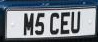

------------------------------------------------------------
d28d71c2690c16ed_jpg.rf.b7c4b2a5e5870d9fcf8644c109c5457f.jpg → ['Ntp 56m1']


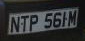

------------------------------------------------------------
d2fe2b47668e9d8e_jpg.rf.c3c019d146ec1fc0bcf7fbeb12c7bc7f.jpg → ['ACNL:']


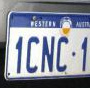

------------------------------------------------------------


In [11]:
import glob
import cv2
import easyocr
from IPython.display import Image, display

# Initialize OCR reader (English)
reader = easyocr.Reader(['en'], gpu=False)

# List all cropped plate images
paths = sorted(glob.glob('/kaggle/working/license_plates/*.jpg'))
print(f"Found {len(paths)} images to OCR.\n")

# Perform OCR and display
for p in paths:
    # Load and convert color for EasyOCR
    img = cv2.imread(p)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Extract text
    texts = reader.readtext(img, detail=0)

    # Show results
    print(f"{p.split('/')[-1]} → {texts}")
    display(Image(filename=p, width=300))
    print("-" * 60)
